In [1]:
%config InlineBackend.figure_formats = ['svg']

import os,shutil
import h5py
from h5glance import H5Glance
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# Helpers
from SimEx.Utilities.Units import meter, electronvolt, joule, radian

# PMI
from SimEx.Calculators.XMDYNDemoPhotonMatterInteractor import XMDYNDemoPhotonMatterInteractor

# Simple Beam Parameters
from SimEx.Parameters.PhotonBeamParameters import PhotonBeamParameters

# Diffraction
from SimEx.Parameters.DetectorGeometry import DetectorGeometry, DetectorPanel
from SimEx.Parameters.SingFELPhotonDiffractorParameters import SingFELPhotonDiffractorParameters
from SimEx.Calculators.SingFELPhotonDiffractor import SingFELPhotonDiffractor

# Analysis
from SimEx.Analysis.XFELPhotonAnalysis import XFELPhotonAnalysis
from SimEx.Analysis.DiffractionAnalysis import DiffractionAnalysis, plotResolutionRings, azimuthalIntegration

initializing ocelot...



https://www.rcsb.org/structure/4V7V

Crystal structure of the E. coli ribosome bound to clindamycin.
21.6 nm x 27.0 nm x 24.7 nm
<img src=https://cdn.rcsb.org/images/rutgers/v7/4v7v/4v7v.pdb1-500.jpg width="300">

*************************
avg = 4.59905e+04
std = 3.77817e+03
avg_mean = 3.80087e+00
avg_max = 3.13705e+02
avg_min = 8.73808e-06
*************************
36


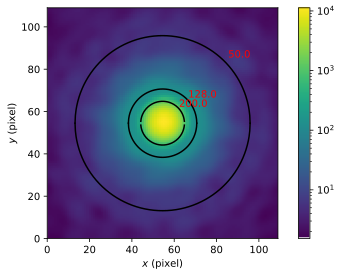

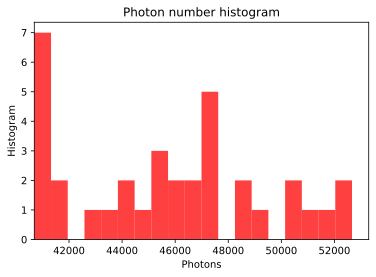

In [3]:
diffr_path = "./diffr.h5"
analyzer = DiffractionAnalysis(input_path=diffr_path,
                               pattern_indices='all',
                               poissonize=False
                              )
analyzer.plotPattern(logscale=True)
plotResolutionRings(analyzer.parameters,rings= (200,128,50), half=False)
analyzer.statistics()
print (analyzer.npattern)

  File "/gpfs/exfel/data/user/juncheng/panoscProject/src/simex_platform/Sources/python/SimEx/Analysis/DiffractionAnalysis.py", line 554, in azimuthalIntegration
    wavelength=lmd*1e-9)


<IPython.core.display.Javascript object>


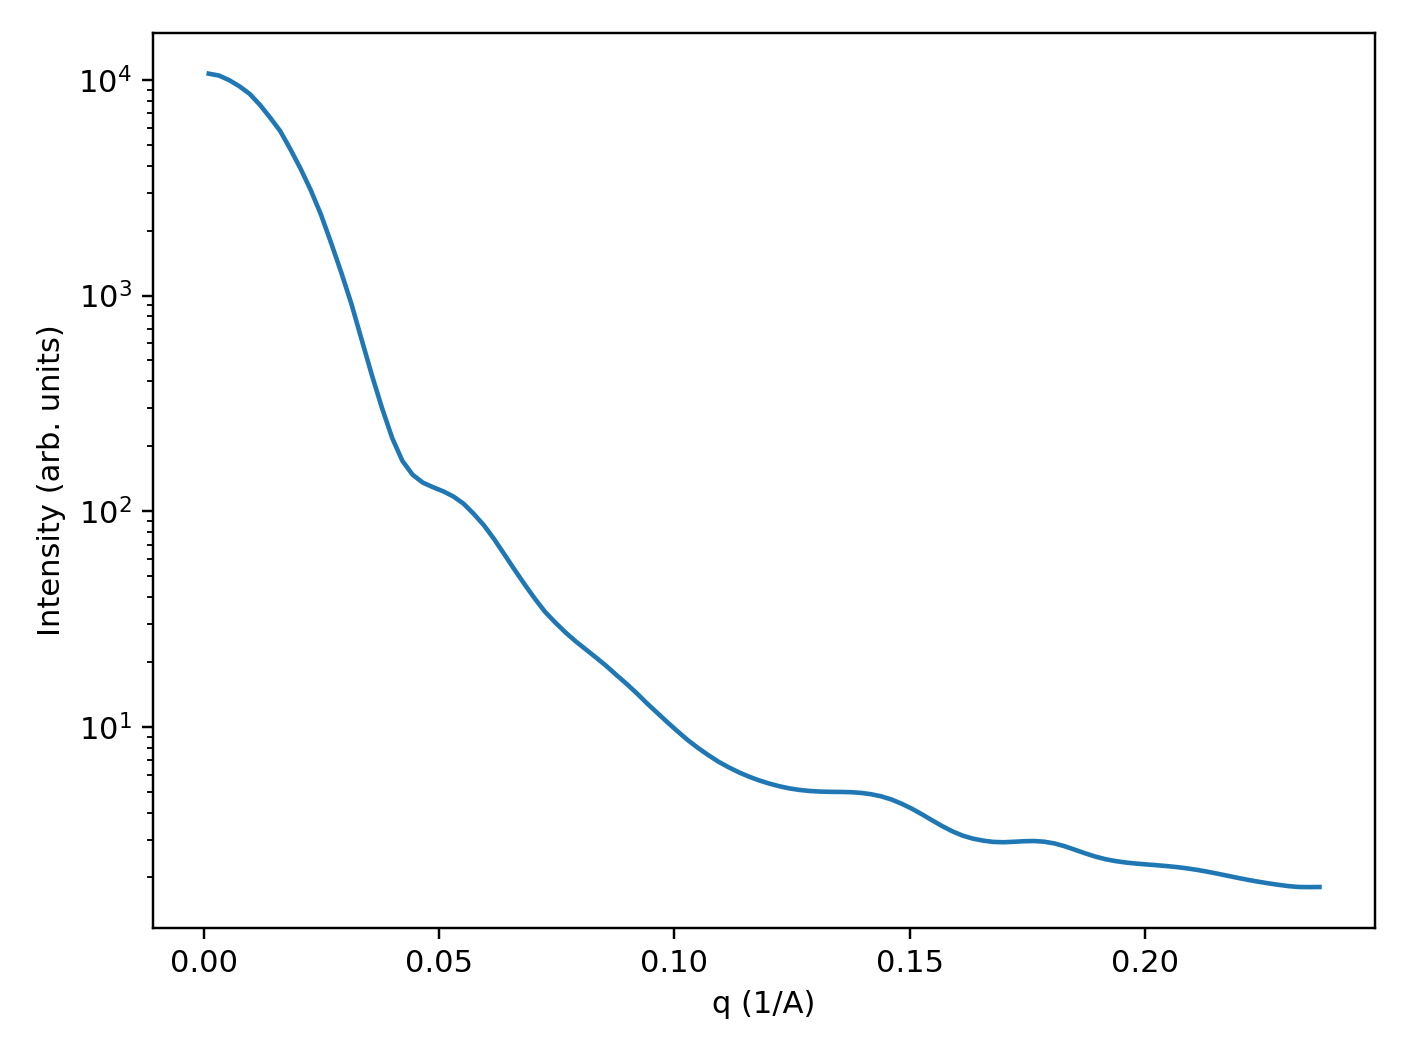

In [5]:
%matplotlib notebook
analyzer.plotRadialProjection(logscale=True,offset=0,unit="q_A^-1")

<IPython.core.display.Javascript object>


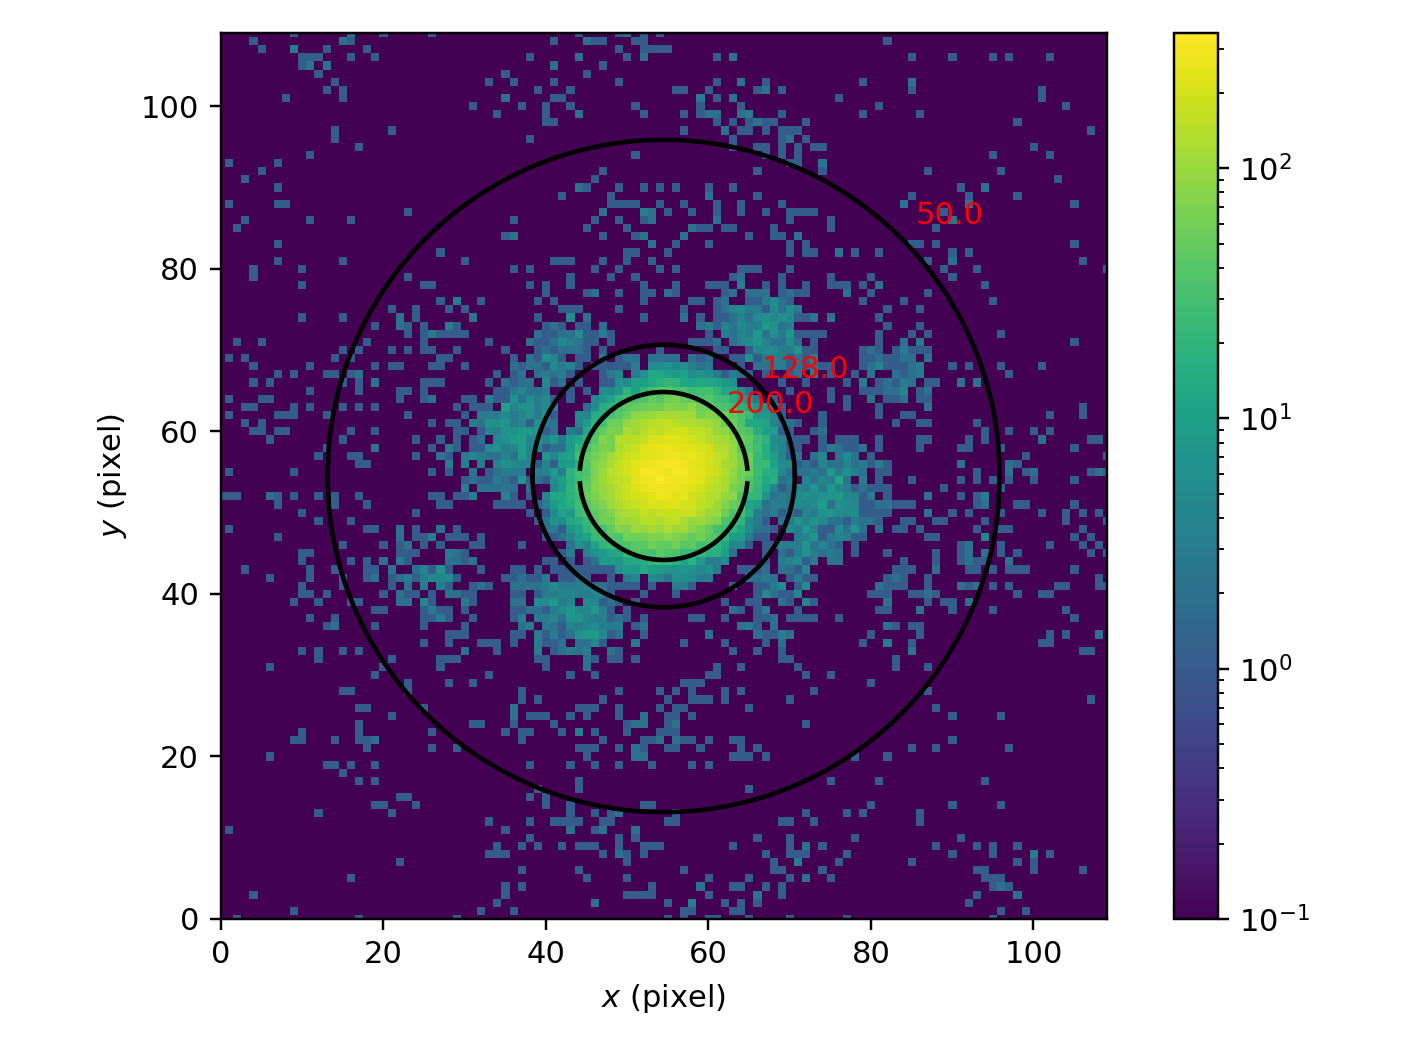

<IPython.core.display.Javascript object>


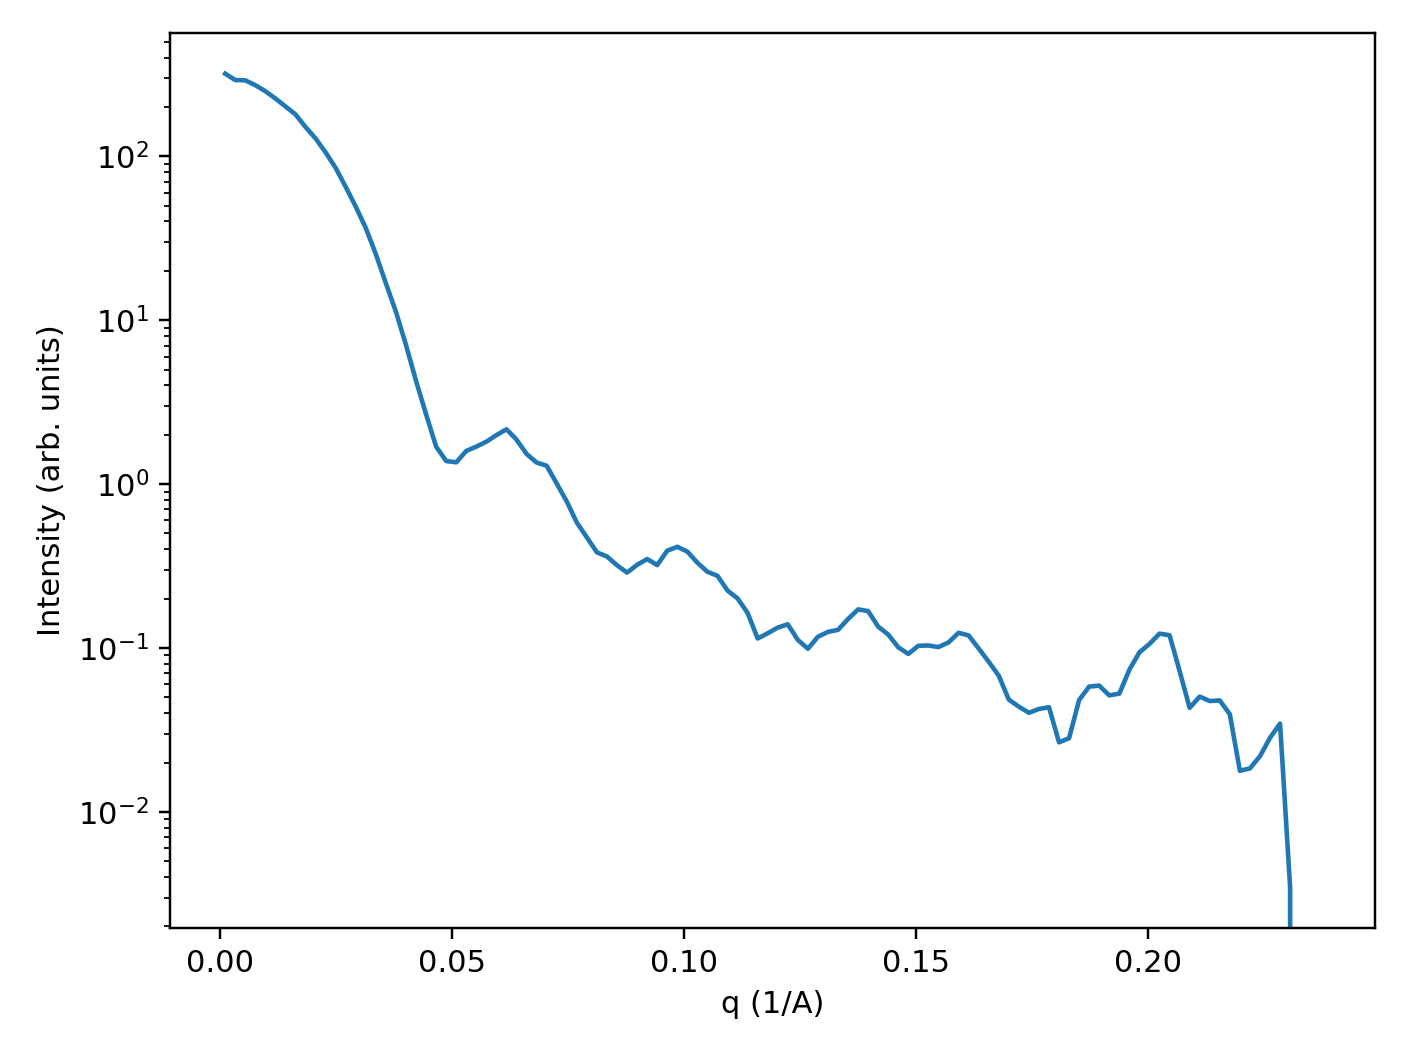

  File "/gpfs/exfel/data/user/juncheng/panoscProject/src/simex_platform/Sources/python/SimEx/Analysis/DiffractionAnalysis.py", line 554, in azimuthalIntegration
    wavelength=lmd*1e-9)


In [11]:
diffr_path = "./diffr.h5"
analyzer = DiffractionAnalysis(input_path=diffr_path,
                               pattern_indices=2,
                               poissonize=True
                              )
analyzer.plotPattern(logscale=True)
plotResolutionRings(analyzer.parameters,rings= (200,128,50), half=False)
plt.figure()
analyzer.plotRadialProjection(logscale=True,offset=0,unit="q_A^-1")
# analyzer.statistics()

  File "/gpfs/exfel/data/user/juncheng/panoscProject/src/simex_platform/Sources/python/SimEx/Analysis/DiffractionAnalysis.py", line 554, in azimuthalIntegration
    wavelength=lmd*1e-9)


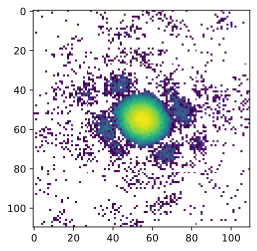

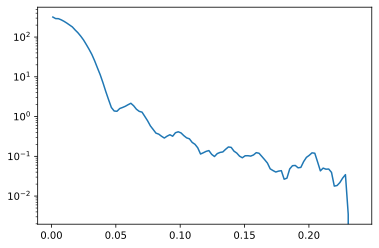

In [5]:
# %matplotlib notebook
pattern = analyzer.numpyPattern()
plt.imshow(pattern,norm=LogNorm())
# qs, intensity = azimuthalIntegration(pattern,analyzer.parameters,'r_mm')
qs, intensity = azimuthalIntegration(pattern,analyzer.parameters,'q_A^-1')

plt.figure()
plt.plot(qs,intensity)
plt.yscale('log')

<IPython.core.display.Javascript object>


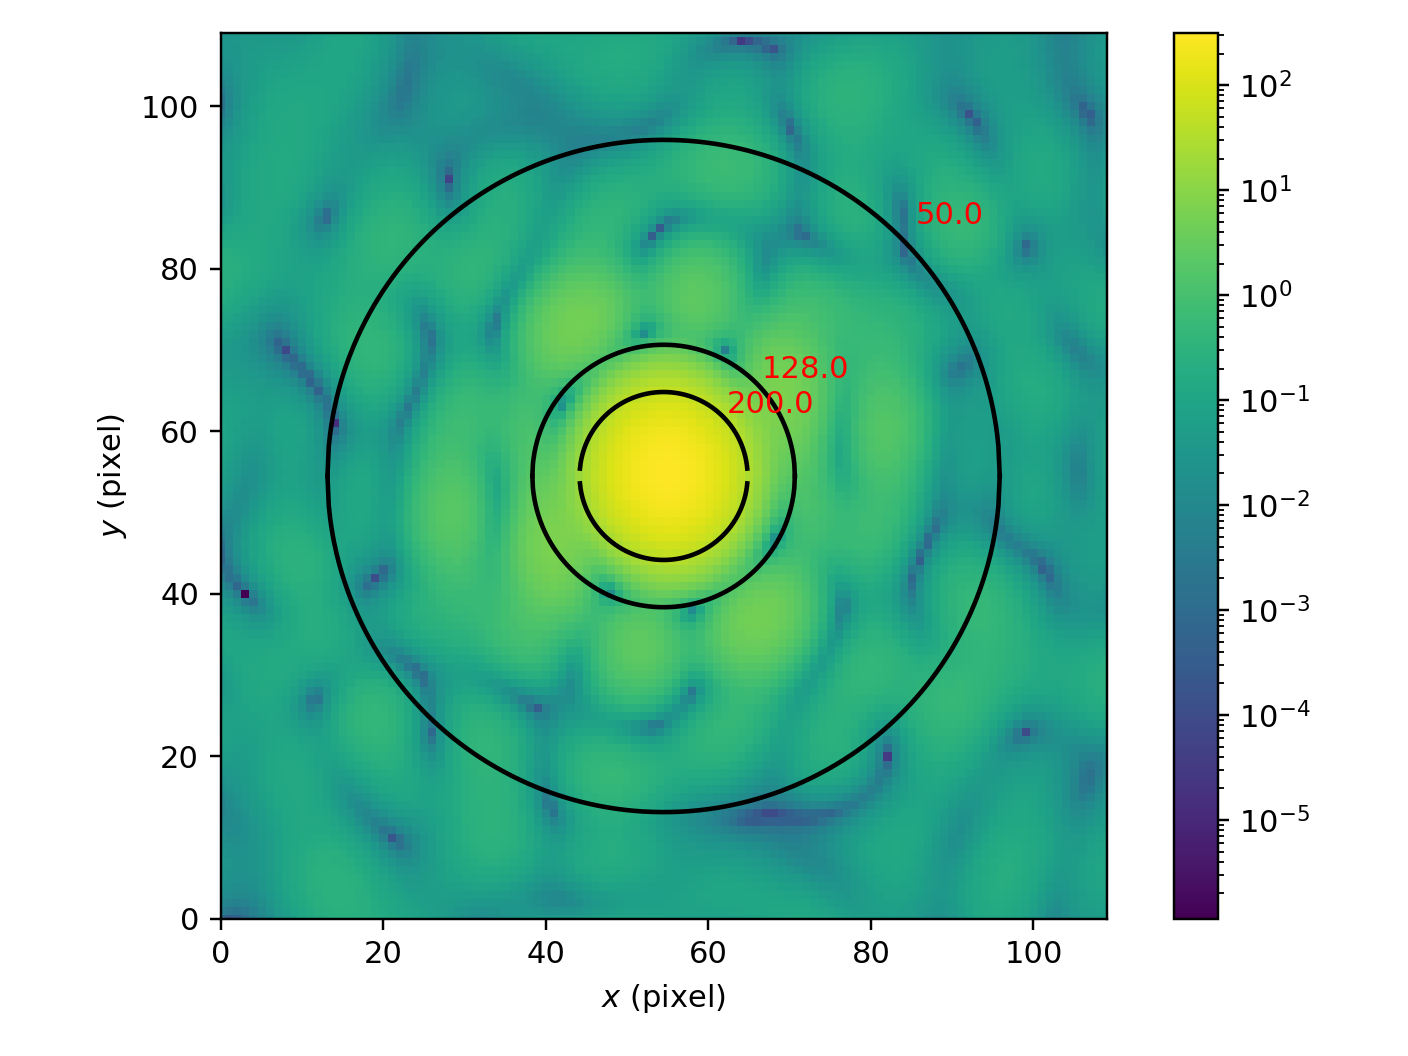

[0.91452538 0.20843133 0.12523235 0.32329022]


In [6]:
diffr_path = "./diffr.h5"
analyzer = DiffractionAnalysis(input_path=diffr_path,
                               pattern_indices=1,
                               poissonize=False
                              )
analyzer.plotPattern(logscale=True)
pattern = analyzer.numpyPattern()
plotResolutionRings(analyzer.parameters,rings= (200,128,50), half=False)
qmap = analyzer.qMap
# analyzer.statistics()
print (analyzer.quaternion)

<IPython.core.display.Javascript object>


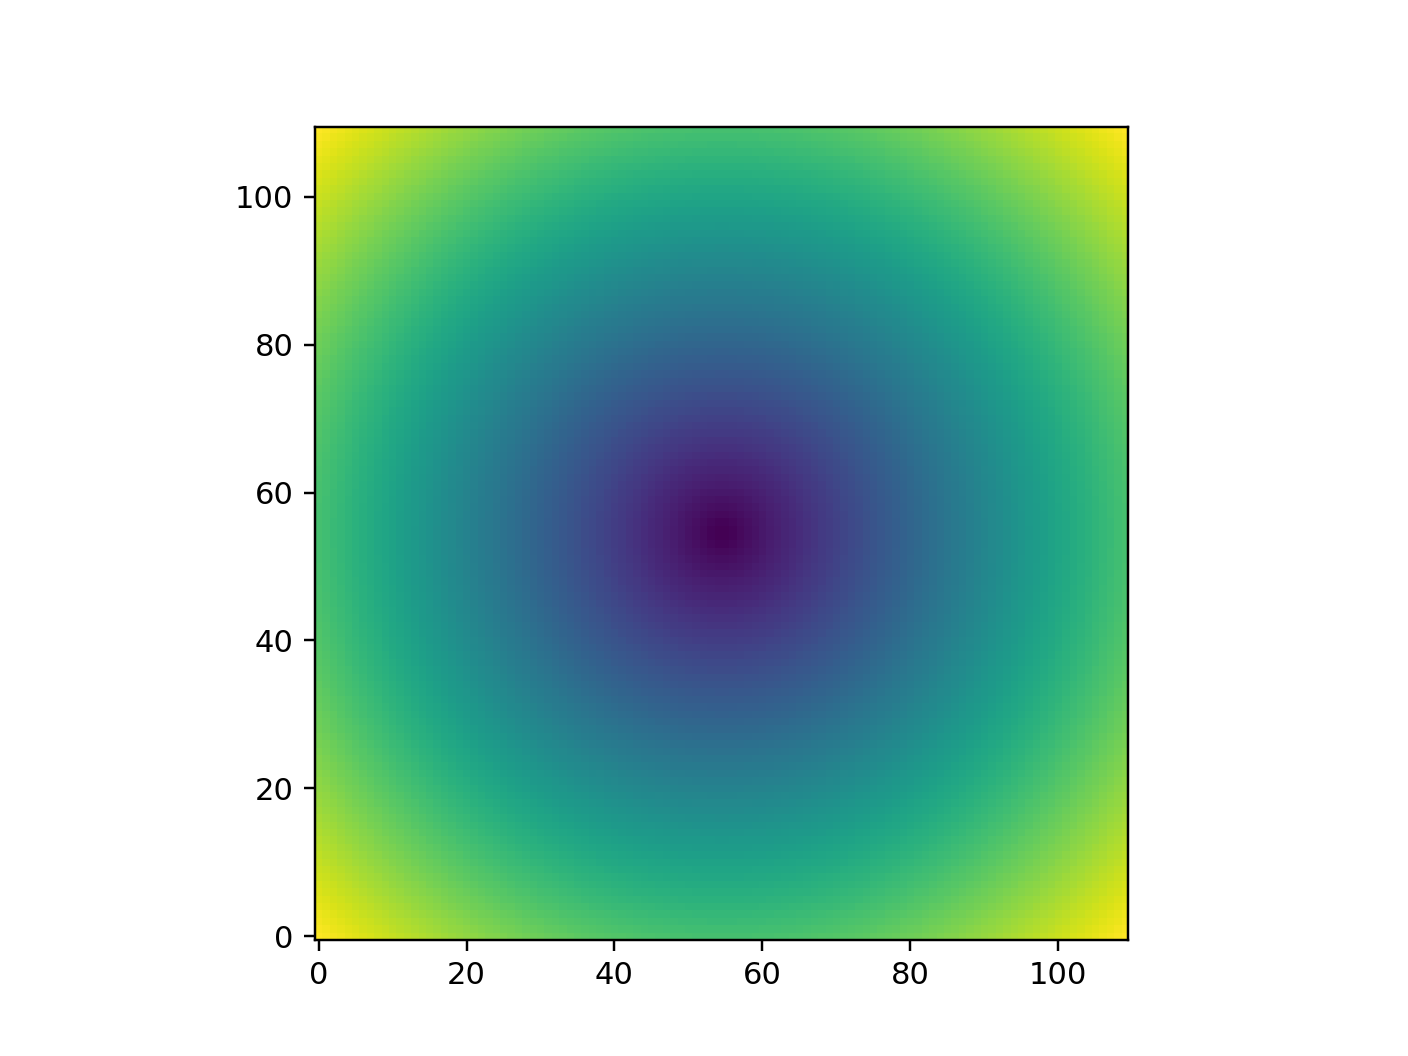

In [7]:
plt.figure()
plt.imshow(qmap,origin='lower')

  File "/gpfs/exfel/data/user/juncheng/panoscProject/src/simex_platform/Sources/python/SimEx/Analysis/DiffractionAnalysis.py", line 554, in azimuthalIntegration
    wavelength=lmd*1e-9)


<IPython.core.display.Javascript object>


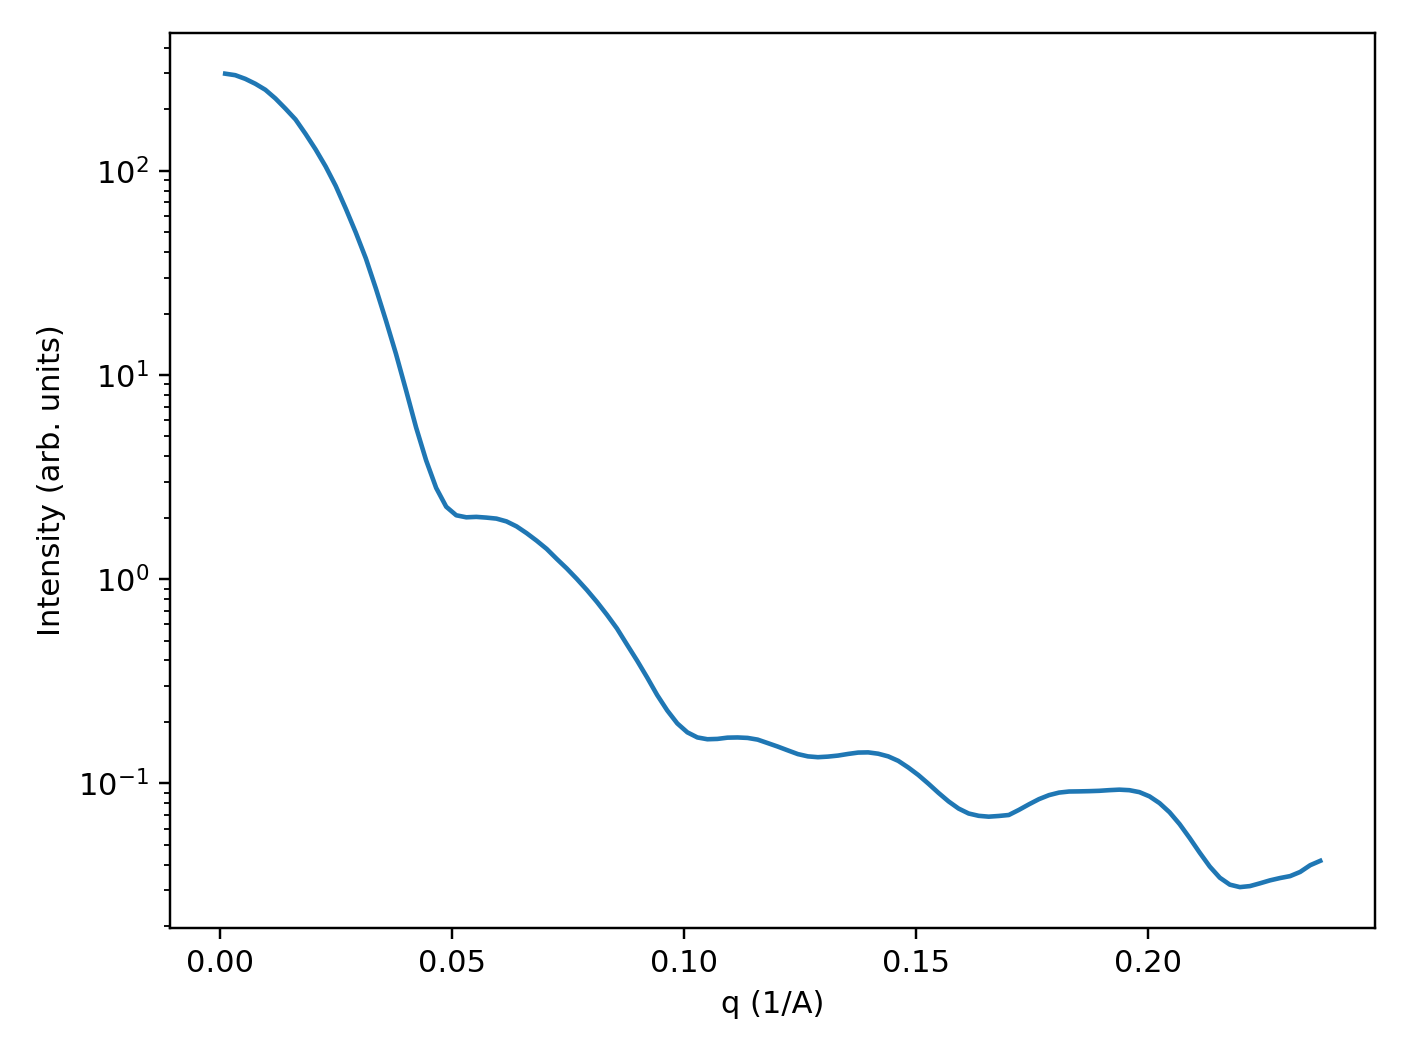

In [10]:
# %matplotlib notebook
# analyzer.plotRadialProjection(logscale=True,offset=0,unit="r_mm")
analyzer.plotRadialProjection(logscale=True,offset=0,unit="q_A^-1")

  File "/gpfs/exfel/data/user/juncheng/panoscProject/src/simex_platform/Sources/python/SimEx/Analysis/DiffractionAnalysis.py", line 554, in azimuthalIntegration
    wavelength=lmd*1e-9)


<IPython.core.display.Javascript object>


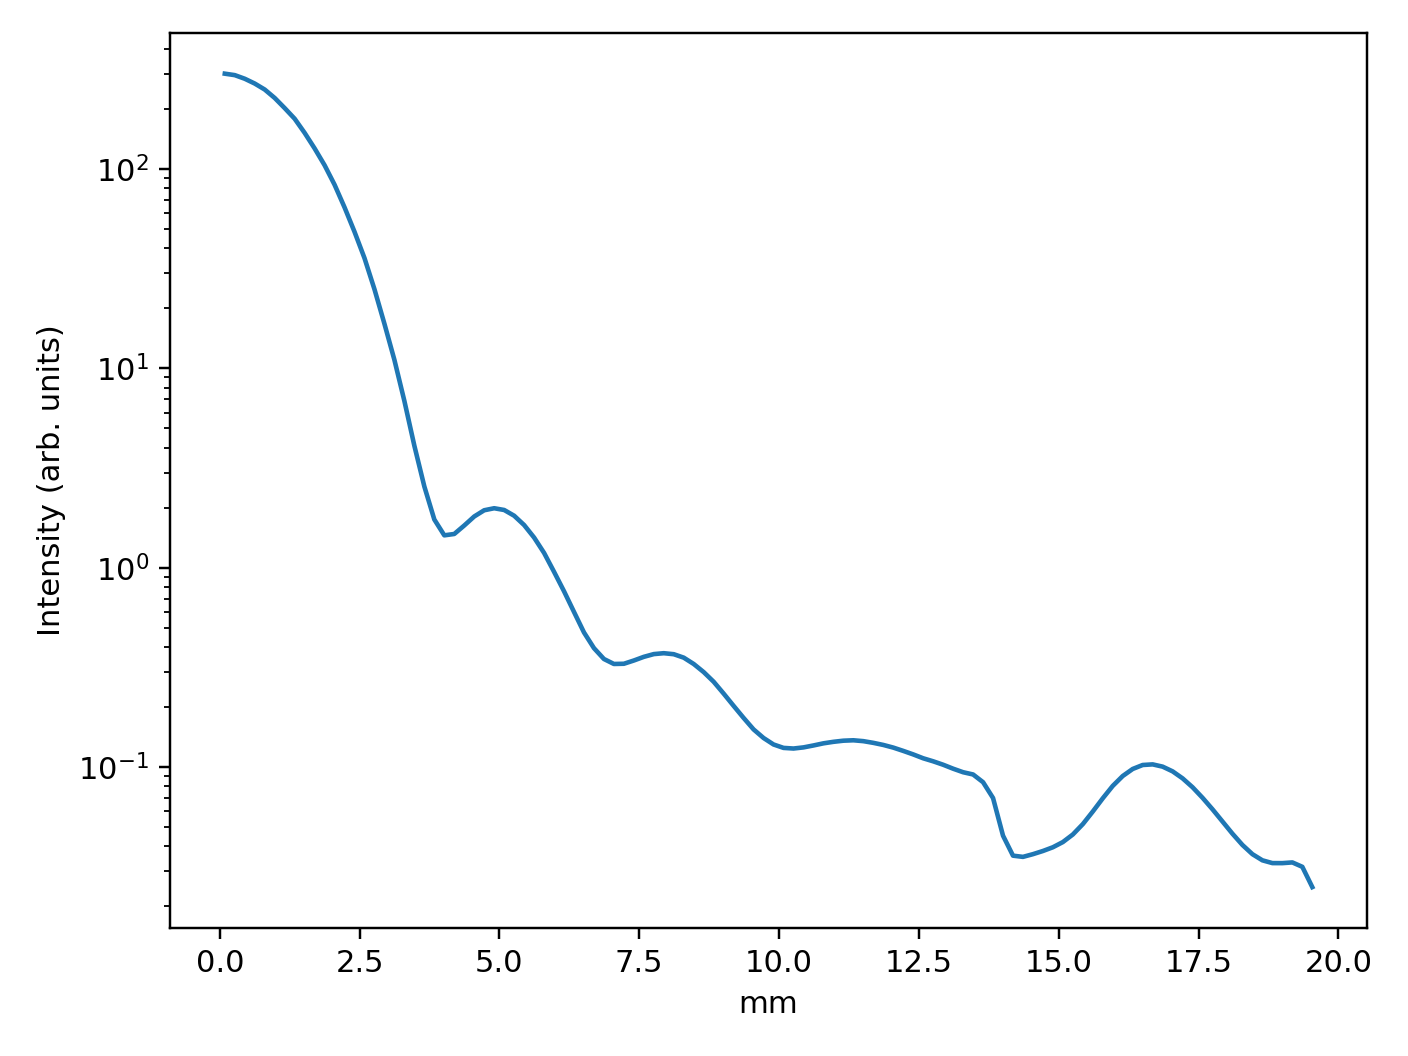

In [10]:
%matplotlib notebook
analyzer.plotRadialProjection(logscale=True,offset=0,unit="r_mm")